In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from AnalysisBackend.hdf5 import modecoupling_hdf5 as mode
from AnalysisBackend.hdf5 import window_hdf5
import glob
import sys
import yaml
import os
import check_pmasks as cp

def avg_diff(pmask1, pmask2, thresh):
    """
    Get the average (absolute value) difference across all pixels between 2 pmasks.
    INPUTS:
    pmask1 (array)
    pmask2 (array)
    thresh (float): Only consider pixels with a pmask1 value > thresh
    OUTPUTS:
    Average abs(difference) (float)
    """
    sum_diff = 0
    counter = 0
    for p1, p2 in zip(np.ndarray.flatten(pmask1), np.ndarray.flatten(pmask2)):
        if p1>thresh:
            counter += 1
            sum_diff += np.abs(p1-p2)        
    return sum_diff/counter

input_yaml = 'inputs/check_pmasks.yaml'
with open(input_yaml) as file:
    inputs = yaml.load(file, Loader=yaml.FullLoader)

hdf5 = inputs['hdf5']
patches = inputs['patches']
sources = inputs['sources']
thresh = inputs['sources']
plot_num = inputs['plot_num']
output_dir = inputs['output_dir']
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#Iterate over all patches
for source, patch in zip(sources, patches):
    coadd_path = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/coadd/{}".format(patch, hdf5)
    days_dir = "/global/cscratch1/sd/jspisak/pipeline/data/sim_signal_only/{}/sim_signal_only/".format(patch)
    days = [day_dir.split('/')[-1] for day_dir in glob.glob(days_dir + "201*")]
    avg_diffs = []
    max_diffs = []
    pmask1 = cp.make_pmask(coadd_path, source)

    #Iterate through each day in the patch and compute the max and average absolute value difference between pmasks 
    for day in days[0:4]:
        day_path = days_dir + day + '/coadd/' + hdf5 
        print(thresh)
        pmask2 = cp.make_pmask(day_path, source)
        max_diffs.append(cp.max_diff(pmask1, pmask2, thresh))
        avg_diffs.append(avg_diff(pmask1, pmask2, thresh))

# Plot the worst offenders for each patch
worst_avg = np.flip(np.argsort(avg_diffs))[0:plot_num]
worst_max = np.flip(np.argsort(max_diffs))[0:plot_num]
for idx in np.unique(np.concatenate((worst_avg, worst_max), axis=0)):
    day = days[idx]
    day_path = days_dir + day + '/coadd/' + hdf5 
    pmasks_plot_diff(coadd_path, day_path, source, day, output_file="{}/pmask_{}_{}".format(output_dir, source, day))

sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources
['PB1RA23HAB', 'PB1RA12HAB', 'PB1LST4p5']
sources.fixed_sources_for_small_patches is used for fixed-source mask
masked 4 fixed sources


/global/common/software/polar/.conda/envs/common-20190803-ab2-defaults-cray/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error


ZeroDivisionError: integer division or modulo by zero

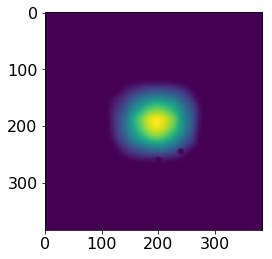

In [8]:
plt.imshow(pmask1)